# Getting started generating models with noddy

1. install pynoddy `pip install pynoddy`
1. grab a pre compined version of noddy https://github.com/flohorovicic/pynoddy/tree/master/noddyapp
1. make sure noddy is on your path (and maybe restart this notebook)
1. then run this script

right now we are just trying to explore how to use pynoddy / noddy to generate a model for our needs. best sources of inspiration are the pynoddy docs: http://pynoddy.readthedocs.io/en/latest/ and examples: https://github.com/flohorovicic/pynoddy/tree/master/examples

In [11]:
import os
model_name = 'fold_dyke_fault'
history_file = model_name+'.his'
output_name = model_name

import sys, os
import matplotlib.pyplot as plt
import numpy as np
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
import pynoddy
import pynoddy.history
import pynoddy.output
%matplotlib inline

In [12]:
cube_size=25
NH1 = pynoddy.history.NoddyHistory(history_file)
NH1.change_cube_size(cube_size)
NH1.write_history(history_file+'.mod')
pynoddy.compute_model(history_file+'.mod', output_name)

''

this will create the block model files with .g\*\* extensions. .g01 is density. by modifying the `.his` file or post processing can we make a velocity cube?

In [13]:
# load the first block file
import numpy as np
model = np.genfromtxt(model_name+".g01", dtype='float')

In [14]:
block_size = map(lambda x: x/cube_size, (5000,10000,7000)) # must match that in history file
print block_size, model.shape
model = model.reshape(block_size)
print model.shape

[200, 400, 280] (80000, 280)
(200, 400, 280)


IndexError: index 200 is out of bounds for axis 0 with size 200

<function __main__.<lambda>>

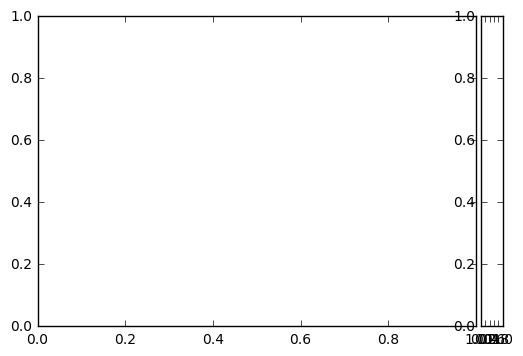

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import *
def display_slice_from_block(model, dir, x):
    fig, ax = plt.subplots()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    if (dir=='x'):
        slice = np.squeeze(model[:,x,:])
    elif (dir=='y'):
        slice = np.squeeze(model[:,:,x])
    else:
        slice = np.squeeze(model[x,:,:])
    
    im = ax.imshow(slice)
    fig.colorbar(im, cax=cax, orientation='vertical')
    plt.show()

f = lambda n: display_slice_from_block(model, 'z', n)
interact(f, n=(0,400))

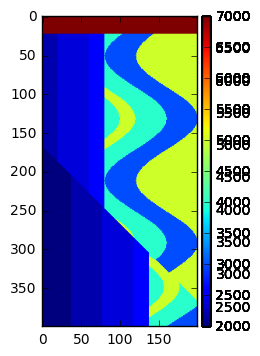

In [22]:
if not os.path.exists('data_'+model_name):
    os.makedirs('data_'+model_name)
    
fig, ax = plt.subplots()
def saveAsPng(fig, ax, slice, filename):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = ax.imshow(slice)
    fig.colorbar(im, cax=cax, orientation='vertical')
    plt.savefig(filename+'.png')
    
filename_stub = 'data_'+model_name+'/'+model_name+'_'

# save out x-z sections
for n in range(0, model.shape[1], 25):
    slice = np.transpose(np.squeeze(model[:,n,:]))
    filename = filename_stub+'xz'+str(n)
    saveAsPng(fig, ax,slice, filename)
    with open(filename+'.su', 'wb+') as f:
        f.write(slice.byteswap().tobytes())
    

# save out y-z sections
for n in range(0, model.shape[2], 25):
    slice = np.transpose(np.squeeze(model[:,:,n]))
    filename=filename_stub+'yz'+str(n);
    saveAsPng(fig, ax,slice, filename)
    with open(filename+'.su', 'wb+') as f:
        f.write(slice.byteswap().tobytes())

todo
 - [x] generate a single slice model
 - [x] make it the right size
 - [ ] get variabiity into models using the pynoddy stochastics / . uncertainty gubbins
 - [ ] batch process -  makes 1000's
 - [x] ascii to binary conversion script, to get the models into su
 - [x] visualise a model in a notebook